In [ ]:
codigo original : "https://www.kaggle.com/code/abdrakhmanmurat/domestic-violence-in-colombia/notebook"

In [2]:
#seimportan librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Se cargan los datos
datos =pd.read_csv('/content/Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv')

<ipython-input-5-db9784cb696d>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  datos =pd.read_csv('/content/Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv')


In [6]:
#visualizar encabezado de los datos
datos.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1


In [7]:
#Información del dataset
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476970 entries, 0 to 476969
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  476970 non-null  object
 1   MUNICIPIO     476970 non-null  object
 2   CODIGO DANE   476970 non-null  object
 3   ARMAS MEDIOS  476968 non-null  object
 4   FECHA HECHO   476970 non-null  object
 5   GENERO        476967 non-null  object
 6   GRUPO ETARIO  475355 non-null  object
 7   CANTIDAD      476970 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 29.1+ MB


In [8]:
#describe arroja un resumen estadistico
datos.describe()

,CANTIDAD
count,476970.000000
mean,1.707764
std,3.338647
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,130.000000


In [9]:
#conocer cuantos datos nulos existen en cada columna
datos.isnull().sum()

,0
DEPARTAMENTO,0
MUNICIPIO,0
CODIGO DANE,0
ARMAS MEDIOS,2
FECHA HECHO,0
GENERO,3
GRUPO ETARIO,1615
CANTIDAD,0


In [10]:
#si se deseara eliminar los registros con datos nulos
datos_filtro = datos.dropna()
datos_filtro.isnull().sum()

,0
DEPARTAMENTO,0
MUNICIPIO,0
CODIGO DANE,0
ARMAS MEDIOS,0
FECHA HECHO,0
GENERO,0
GRUPO ETARIO,0
CANTIDAD,0


In [11]:
#En caso dado no se desea eliminar el registro sino que se desea llenar los datos nulos por un valor defino en este caso con "no registra"
datos_lleno = datos.fillna("no registra")
datos_lleno.isnull().sum()

,0
DEPARTAMENTO,0
MUNICIPIO,0
CODIGO DANE,0
ARMAS MEDIOS,0
FECHA HECHO,0
GENERO,0
GRUPO ETARIO,0
CANTIDAD,0


In [12]:
#si se desea rellenar el campo vacio  con el valor mas frecuente en la columna
datos_media = datos

datos_media.fillna({'ARMAS MEDIOS': datos_media['ARMAS MEDIOS'].mode().iloc[0]}, inplace=True)
datos_media.fillna({'GENERO': datos_media['GENERO'].mode().iloc[0]}, inplace=True)
datos_media.fillna({'GRUPO ETARIO': datos_media['GRUPO ETARIO'].mode().iloc[0]}, inplace=True)
datos_media.isnull().sum()

,0
DEPARTAMENTO,0
MUNICIPIO,0
CODIGO DANE,0
ARMAS MEDIOS,0
FECHA HECHO,0
GENERO,0
GRUPO ETARIO,0
CANTIDAD,0


In [13]:
#para observar los datos categorizados de cada columna
datos['ARMAS MEDIOS'].unique()
datos['GENERO'].unique()
datos['GRUPO ETARIO'].unique()
np.sort(datos['CANTIDAD'].unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        97,  98, 100, 101, 102, 105, 106, 107, 109, 118, 130])

In [14]:
datos_media.isnull().sum()

,0
DEPARTAMENTO,0
MUNICIPIO,0
CODIGO DANE,0
ARMAS MEDIOS,0
FECHA HECHO,0
GENERO,0
GRUPO ETARIO,0
CANTIDAD,0


Visualización de datos

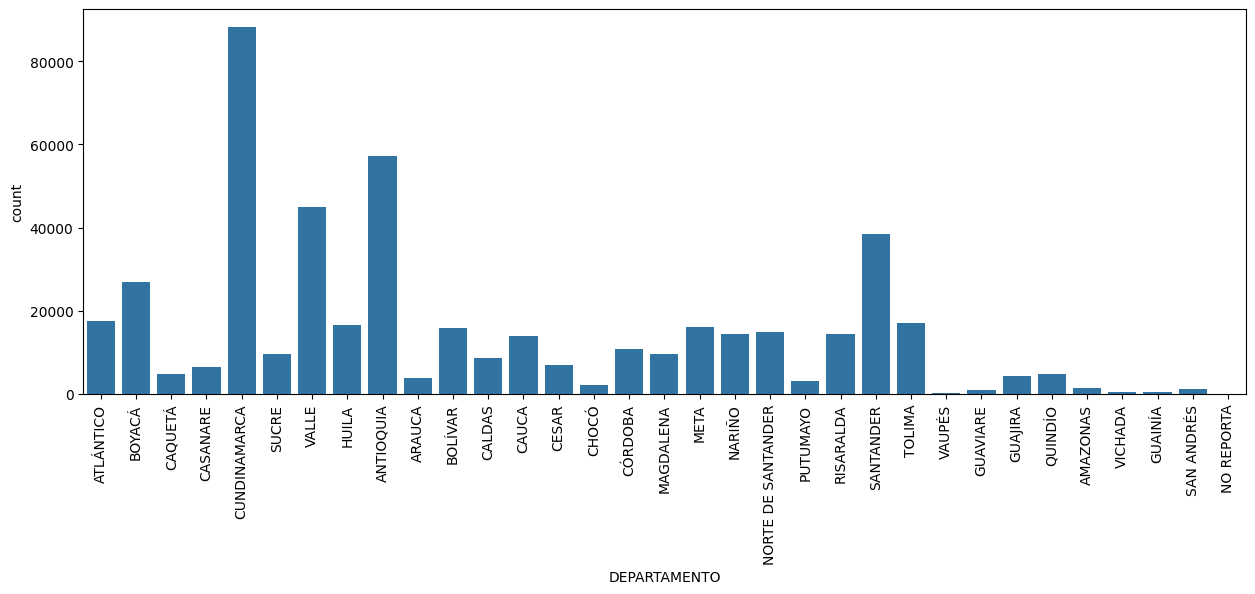

In [15]:
#VISUALIZAR DIAGRAMA DE BARRAS DEL NUMERO REGISTROS POR DEPARTAMENTO
plt.figure(figsize=(15,5))
sns.countplot(x=datos_media['DEPARTAMENTO'])
plt.xticks(rotation=90)
plt.show()

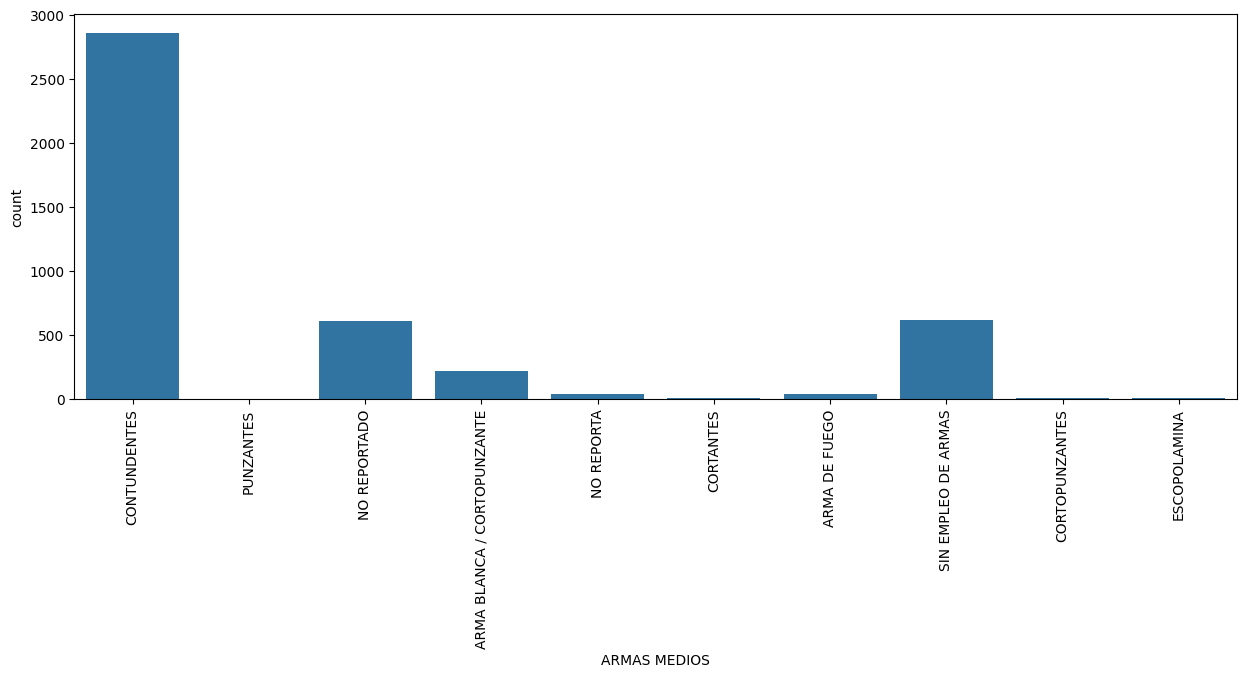

In [16]:
#VISUALIZAR DIAGRAMA DE BARRAS DEL TIPO DE ARMA  PARA EL DEPARTAMENTO DE LA GUAJIRA
datos_guajira = datos_media[datos_media["DEPARTAMENTO"] == "GUAJIRA"]
plt.figure(figsize=(15,5))
sns.countplot(x=datos_guajira['ARMAS MEDIOS'])
plt.xticks(rotation=90)
plt.show()

<ipython-input-101-1a624a52b3a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_cordoba['FECHA HECHO'] = pd.to_datetime(datos_cordoba['FECHA HECHO'], format='%d/%m/%Y')


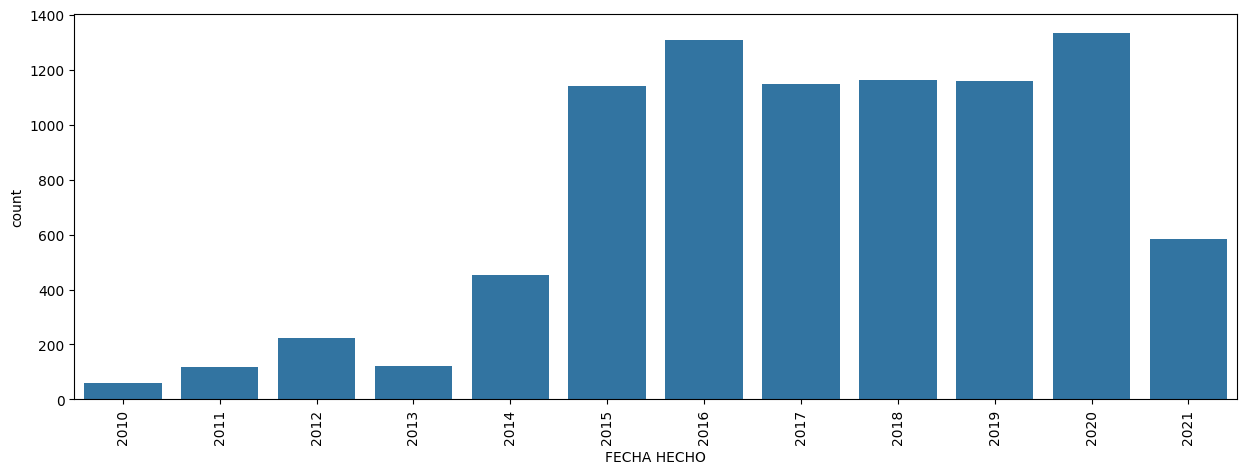

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
38,CÓRDOBA,MONTERÍA (CT),23001000,CONTUNDENTES,2010-01-01,FEMENINO,ADULTOS,1
434,CÓRDOBA,MONTERÍA (CT),23001000,CONTUNDENTES,2010-01-09,FEMENINO,ADULTOS,2
483,CÓRDOBA,MONTERÍA (CT),23001000,CONTUNDENTES,2010-01-10,FEMENINO,ADULTOS,2
545,CÓRDOBA,MONTERÍA (CT),23001000,CONTUNDENTES,2010-01-11,FEMENINO,ADULTOS,2
592,CÓRDOBA,MONTERÍA (CT),23001000,CONTUNDENTES,2010-01-12,FEMENINO,ADULTOS,2
...,...,...,...,...,...,...,...,...
469126,CÓRDOBA,TIERRALTA,23807000,SIN EMPLEO DE ARMAS,2021-05-31,FEMENINO,ADULTOS,2
469127,CÓRDOBA,TUCHÍN,23815000,SIN EMPLEO DE ARMAS,2021-04-09,FEMENINO,ADULTOS,1
469128,CÓRDOBA,TUCHÍN,23815000,SIN EMPLEO DE ARMAS,2021-04-17,FEMENINO,ADULTOS,1
469129,CÓRDOBA,TUCHÍN,23815000,SIN EMPLEO DE ARMAS,2021-05-30,FEMENINO,ADULTOS,1


In [101]:
#VISUALIZAR DIAGRAMA DE BARRAS DE LOS REGISTROS ANUALES PARA EL DEPARTAMENTO DE CORDOBA  CON GENERO FEMENINO
datos_cordoba = datos_media[(datos_media["DEPARTAMENTO"] == "CÓRDOBA") & (datos_media["GENERO"] == "FEMENINO")]
# Convertir la columna 'FECHA HECHO' a tipo datetime
datos_cordoba['FECHA HECHO'] = pd.to_datetime(datos_cordoba['FECHA HECHO'], format='%d/%m/%Y')

plt.figure(figsize=(15,5))
sns.countplot(x=datos_cordoba['FECHA HECHO'].dt.year)
plt.xticks(rotation=90)
plt.show()
datos_cordoba

In [21]:
#si se dese a cambiar la clasificación de alguna columna
df_abn = datos_media.copy()
df_abn['ARMAS MEDIOS'] = df_abn['ARMAS MEDIOS'].map({'ARMA BLANCA / CORTOPUNZANTE': 1, 'ARMA DE FUEGO': 2, 'CONTUNDENTES':3, 'CORTANTES': 4, 'CORTOPUNZANTES': 5,'NO REPORTADO': 99, 'PUNZANTES': 6, 'SIN EMPLEO DE ARMAS': 7,'NO REPORTA':99, 'ESCOPOLAMINA': 8 ,'-': 999})
np.sort(df_abn['ARMAS MEDIOS'].unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,  99, 999])

In [22]:
#para hallar la moda de una columna se usa mode()
df_abn['ARMAS MEDIOS'].mode()

,ARMAS MEDIOS
0,3


In [24]:
trainx= df_abn.copy()
trainx=trainx.drop('ARMAS MEDIOS', axis=1)
trainy=df_abn['ARMAS MEDIOS']

In [27]:
#Esta línea de código transforma las variables categóricas 'MUNICIPIO', 'DEPARTAMENTO', 'GENERO' y 'GRUPO ETARIO' en un formato numérico adecuado para su uso en modelos de machine learning, preparando así los datos para el entrenamiento del modelo
trainx_encoded = pd.get_dummies(trainx, columns = ['MUNICIPIO', 'DEPARTAMENTO', 'GENERO','GRUPO ETARIO'])
trainx_encoded

,CODIGO DANE,FECHA HECHO,CANTIDAD,MUNICIPIO_ABEJORRAL,MUNICIPIO_ABREGO,MUNICIPIO_ABRIAQUÍ,MUNICIPIO_ACACÍAS,MUNICIPIO_ACANDÍ,MUNICIPIO_ACEVEDO,MUNICIPIO_ACHÍ,...,DEPARTAMENTO_VAUPÉS,DEPARTAMENTO_VICHADA,GENERO_-,GENERO_FEMENINO,GENERO_MASCULINO,GENERO_NO REPORTA,GRUPO ETARIO_ADOLESCENTES,GRUPO ETARIO_ADULTOS,GRUPO ETARIO_MENORES,GRUPO ETARIO_NO REPORTA
0,8001000,1/01/2010,1,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
1,15238000,1/01/2010,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,18592000,1/01/2010,1,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,85139000,1/01/2010,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,11001000,1/01/2010,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476965,99624000,44250,1,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
476966,99624000,44262,1,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
476967,99624000,44300,1,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
476968,25793000,44294,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [28]:
trainx_encoded.columns.unique()

Index(['CODIGO DANE', 'FECHA HECHO', 'CANTIDAD', 'MUNICIPIO_ABEJORRAL',
       'MUNICIPIO_ABREGO', 'MUNICIPIO_ABRIAQUÍ', 'MUNICIPIO_ACACÍAS',
       'MUNICIPIO_ACANDÍ', 'MUNICIPIO_ACEVEDO', 'MUNICIPIO_ACHÍ',
       ...
       'DEPARTAMENTO_VAUPÉS', 'DEPARTAMENTO_VICHADA', 'GENERO_-',
       'GENERO_FEMENINO', 'GENERO_MASCULINO', 'GENERO_NO REPORTA',
       'GRUPO ETARIO_ADOLESCENTES', 'GRUPO ETARIO_ADULTOS',
       'GRUPO ETARIO_MENORES', 'GRUPO ETARIO_NO REPORTA'],
      dtype='object', length=1066)

Inicia machine learning

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(trainx_encoded, trainy, test_size=0.2, random_state=42)

In [ ]:
X_train

Construyendo el modelo

In [33]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [34]:
X_train, y_train = make_classification(n_samples=381576, n_features=1059, n_informative=5, n_redundant=5, n_classes=3, random_state=12)
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model on the whole dataset
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [35]:
model.score(X_train, y_train)

0.8104073631465292

In [36]:
X_test, y_test = make_classification(n_samples=95394, n_features=1059, n_informative=5, n_redundant=5, n_classes=3, random_state=12)

In [37]:
y_pred = model.predict(X_test)

In [38]:
y_pred

array([1, 0, 2, ..., 2, 2, 1])

In [39]:
y_test

array([2, 0, 1, ..., 1, 1, 2])

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.3008470134390004

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.3376837117638426

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.9512706243690436

In [43]:
model.score(X_test, y_test)

0.3376837117638426

In [44]:
print('Train Accuracy: %.2f' % (model.score(X_train, y_train)))
print('Test Accuracy: %.2f' % (model.score(X_test, y_test)))

Train Accuracy: 0.81
Test Accuracy: 0.34
